In [ ]:
pip install fastquant

     |████████████████████████████████| 5.3 MB 4.6 MB/s 
     |████████████████████████████████| 191 kB 43.6 MB/s 
     |████████████████████████████████| 2.2 MB 47.5 MB/s 
     |████████████████████████████████| 138 kB 34.8 MB/s 
     |████████████████████████████████| 1.5 MB 55.3 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 503 kB 60.7 MB/s 
     |████████████████████████████████| 410 kB 60.8 MB/s 
     |████████████████████████████████| 6.3 MB 48.7 MB/s 
     |████████████████████████████████| 156 kB 50.8 MB/s 
     |████████████████████████████████| 843 kB 55.3 MB/s 
     |████████████████████████████████| 271 kB 58.0 MB/s 
     |████████████████████████████████| 3.6 MB 37.8 MB/s 
     |████████████████████████████████| 1.1 MB 42.1 MB/s 
     |████████████████████████████████| 160 kB 43.6 MB/s 
     |████████████████████████████████| 291 kB 46.5 MB/s 
     |████████████████████████████████| 192 kB 47.3 MB/s 
     |███████████

In [ ]:
from fastquant import backtest, get_crypto_data
import numpy as np

In [ ]:
df = get_crypto_data("BTCUSDT",'2021-01-01','2021-11-27','1h')

In [ ]:
df

,open,high,low,close,volume
dt,,,,,
2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445
2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471
2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560
2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077
2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803
...,...,...,...,...,...
2021-11-26 20:00:00,54326.77,54584.74,54209.86,54515.70,988.351470
2021-11-26 21:00:00,54515.70,54568.99,53959.99,53973.04,1161.716830
2021-11-26 22:00:00,53973.04,54398.99,53800.00,54062.75,1200.550260


In [ ]:
from scipy.ndimage import convolve1d as conv
df['MA'] = df['close'].rolling(window=14).mean()
def bb_indicator(data):
  
  df['STD'] = df['close'].rolling(window=14).std()

  df['Upper_Band'] = df['MA'] + (df['STD'] * 2)

  df['Lower_Band'] = df['MA'] - (df['STD'] * 2)

In [ ]:
import backtrader as bt

In [ ]:
def adder(data, times):
    
    for i in range(1, times + 1):
    
        z = np.zeros((len(Data), 1), dtype = float)
        Data = np.append(Data, z, axis = 1)
    return Data

In [ ]:


def tr(df, n=14):
    data = df.copy()
    high = data['high']
    low = data['low']
    close = data['close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
  
    return tr

df['TR'] = tr(df, n=14)

In [ ]:
df

,open,high,low,close,volume,MA,TR
dt,,,,,,,
2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445,NaN,341.17
2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471,NaN,509.65
2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560,NaN,345.23
2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077,NaN,216.98
2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803,NaN,365.60
...,...,...,...,...,...,...,...
2021-11-26 20:00:00,54326.77,54584.74,54209.86,54515.70,988.351470,54603.549286,374.88
2021-11-26 21:00:00,54515.70,54568.99,53959.99,53973.04,1161.716830,54390.347857,609.00
2021-11-26 22:00:00,53973.04,54398.99,53800.00,54062.75,1200.550260,54308.337143,598.99


In [ ]:
df['ATR'] = df['TR'].ewm(span = 14).mean()

In [ ]:
df

,open,high,low,close,volume,MA,TR,ATR
dt,,,,,,,,
2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445,NaN,341.17,341.170000
2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471,NaN,509.65,431.427143
2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560,NaN,345.23,398.499542
2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077,NaN,216.98,342.967593
2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803,NaN,365.60,348.872354
...,...,...,...,...,...,...,...,...
2021-11-26 20:00:00,54326.77,54584.74,54209.86,54515.70,988.351470,54603.549286,374.88,586.236157
2021-11-26 21:00:00,54515.70,54568.99,53959.99,53973.04,1161.716830,54390.347857,609.00,589.271336
2021-11-26 22:00:00,53973.04,54398.99,53800.00,54062.75,1200.550260,54308.337143,598.99,590.567158


In [ ]:
df['ATR'] = ( df['ATR'].shift(1)*13 + df['TR'] ) /  14

In [ ]:
df

,open,high,low,close,volume,MA,TR,ATR
dt,,,,,,,,
2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445,NaN,341.17,NaN
2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471,NaN,509.65,353.204286
2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560,NaN,345.23,425.270204
2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077,NaN,216.98,385.533860
2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803,NaN,365.60,344.584194
...,...,...,...,...,...,...,...,...
2021-11-26 20:00:00,54326.77,54584.74,54209.86,54515.70,988.351470,54603.549286,374.88,601.333025
2021-11-26 21:00:00,54515.70,54568.99,53959.99,53973.04,1161.716830,54390.347857,609.00,587.862146
2021-11-26 22:00:00,53973.04,54398.99,53800.00,54062.75,1200.550260,54308.337143,598.99,589.965526


In [ ]:
df['U3'] = df['MA'] + df['ATR']*1.618
df['U2'] = df['MA'] + df['ATR']*2.618
df['U1'] = df['MA'] + df['ATR']*4.236

df['L1'] = df['MA'] - df['ATR']*1.618
df['L2'] = df['MA'] - df['ATR']*2.618
df['L3'] = df['MA'] - df['ATR']*4.236

In [ ]:
df

,open,high,low,close,volume,MA,TR,ATR,U3,U2,U1,L1,L2,L3
dt,,,,,,,,,,,,,,
2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445,NaN,341.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471,NaN,509.65,353.204286,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560,NaN,345.23,425.270204,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077,NaN,216.98,385.533860,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803,NaN,365.60,344.584194,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26 20:00:00,54326.77,54584.74,54209.86,54515.70,988.351470,54603.549286,374.88,601.333025,55576.506120,56177.839145,57150.795980,53630.592451,53029.259426,52056.302591
2021-11-26 21:00:00,54515.70,54568.99,53959.99,53973.04,1161.716830,54390.347857,609.00,587.862146,55341.508809,55929.370954,56880.531906,53439.186906,52851.324760,51900.163809
2021-11-26 22:00:00,53973.04,54398.99,53800.00,54062.75,1200.550260,54308.337143,598.99,589.965526,55262.901364,55852.866890,56807.431112,53353.772922,52763.807395,51809.243174


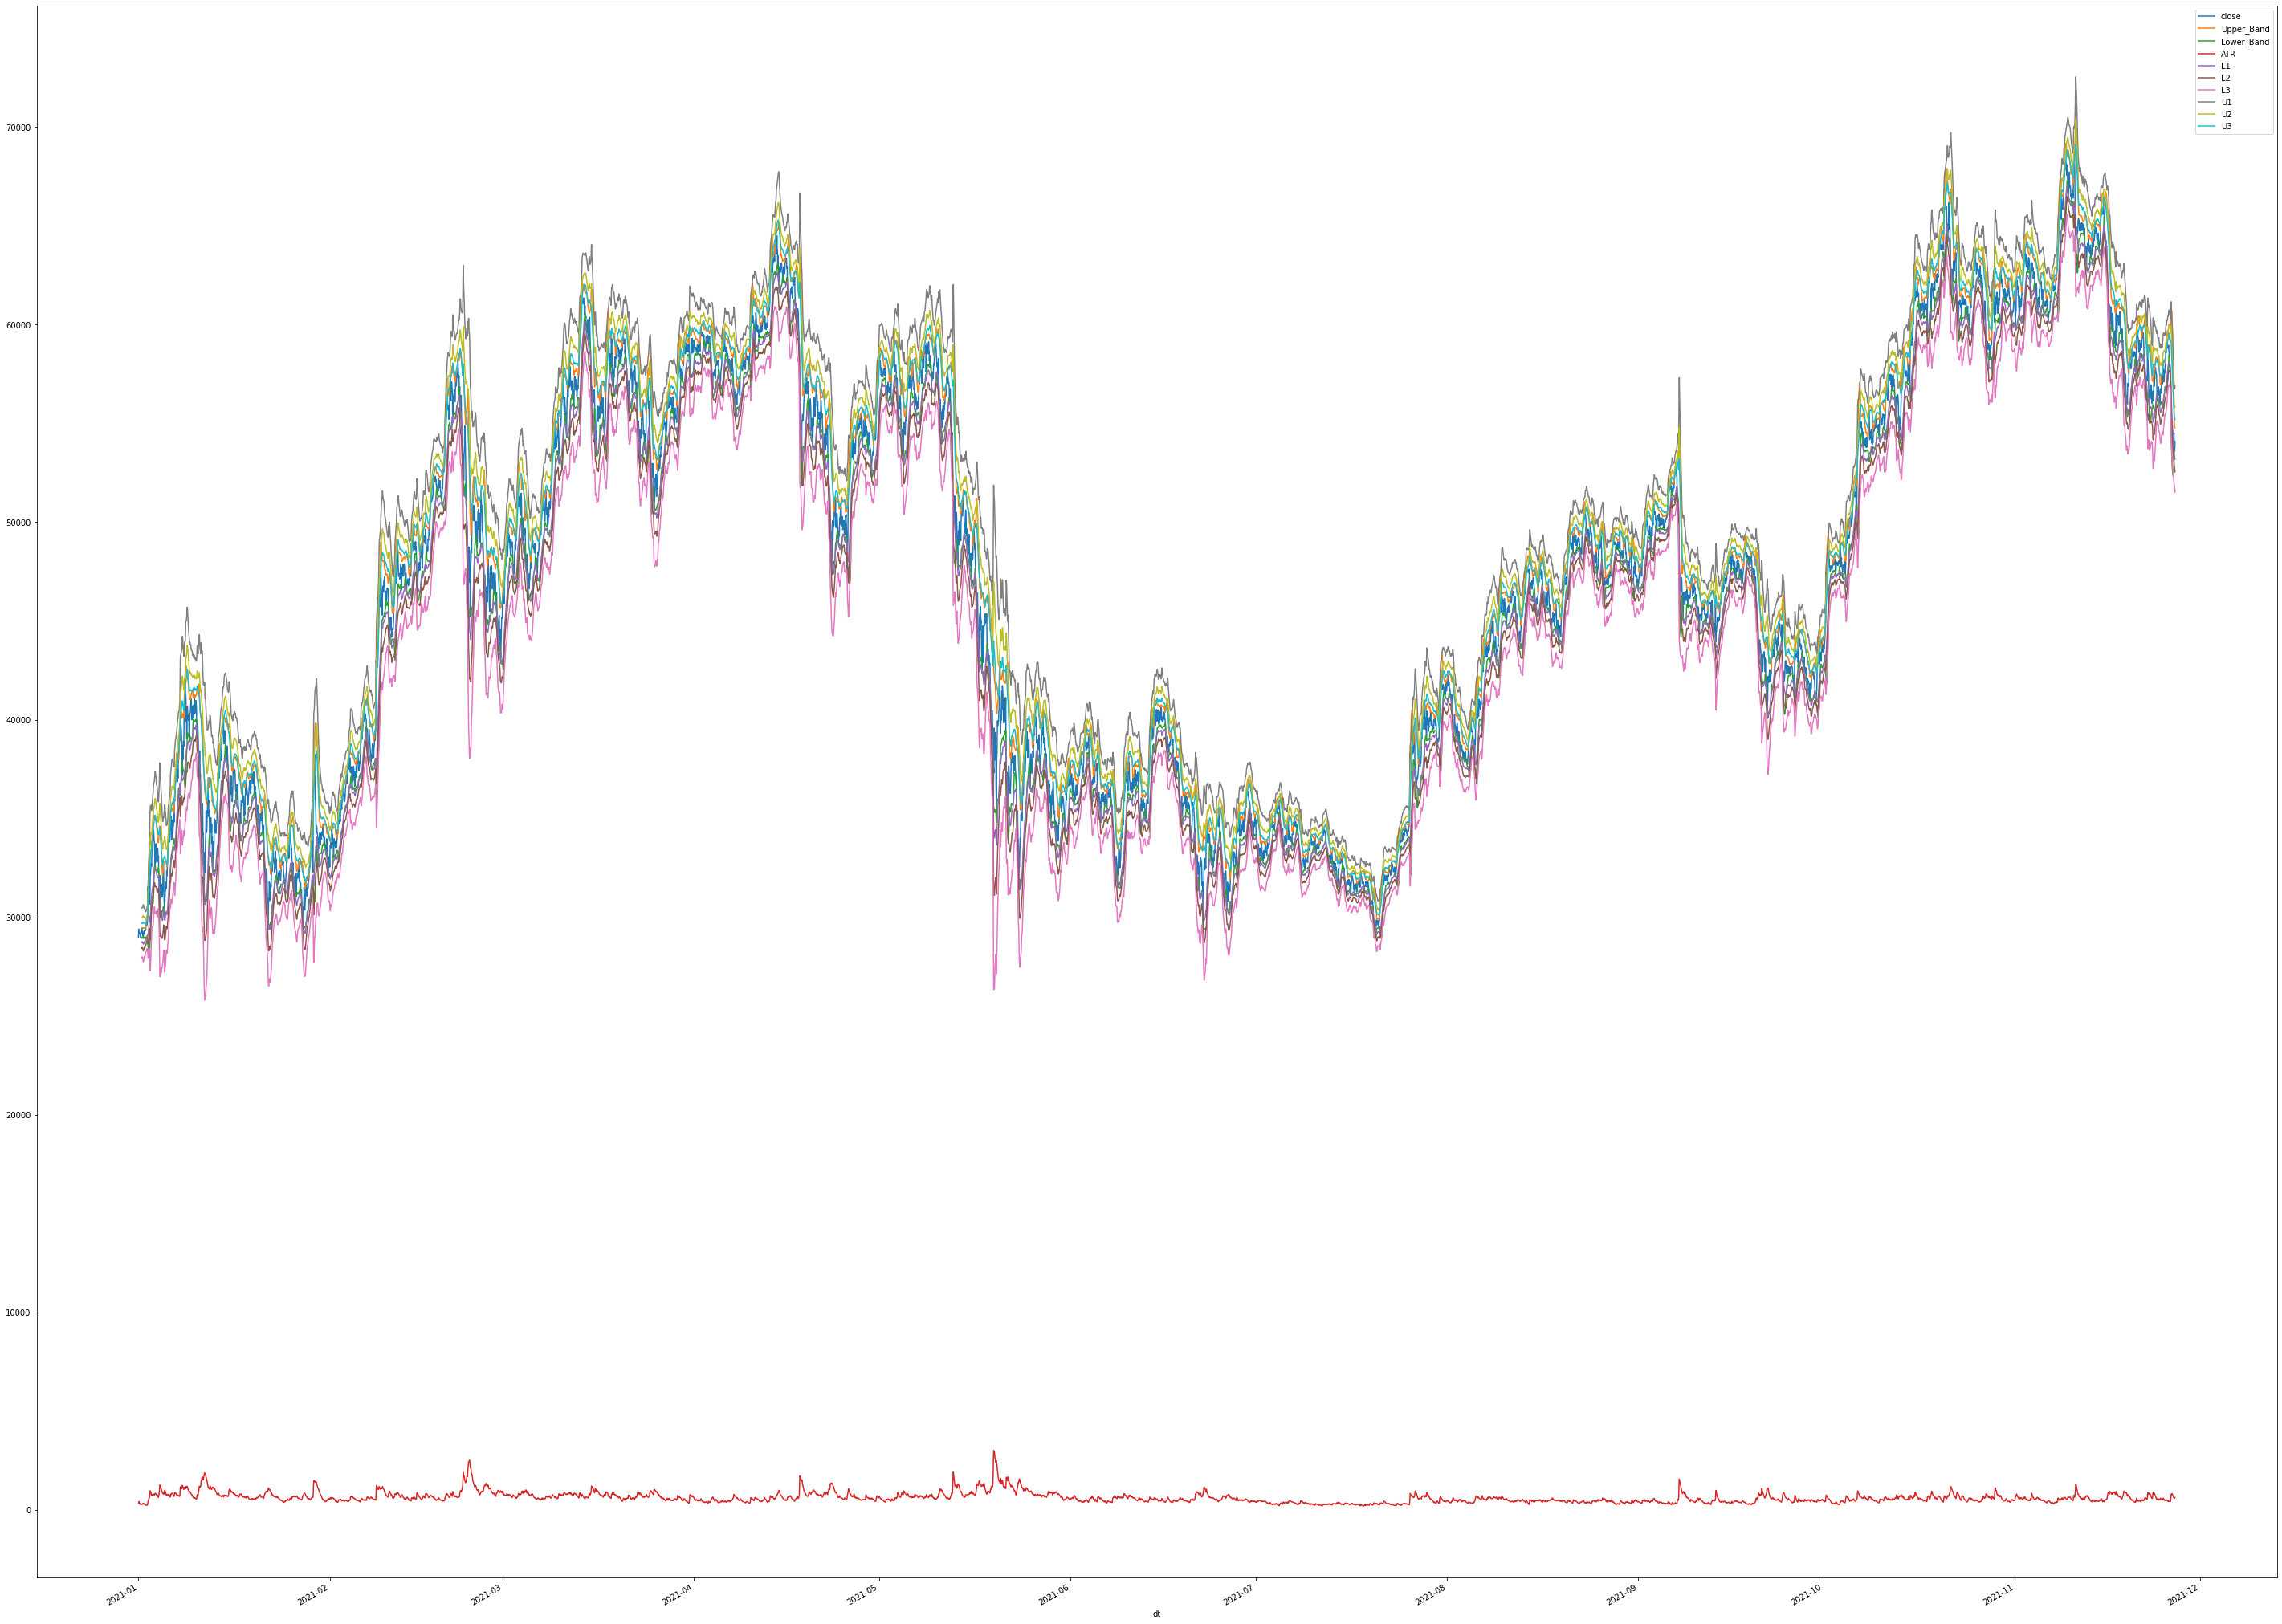

In [ ]:
%matplotlib inline
bb_indicator(df.close)


df[["close","Upper_Band","Lower_Band","ATR","L1","L2","L3","U1","U2","U3"]].plot(figsize=(50,40))

In [ ]:
from fastquant import CustomStrategy, BaseStrategy
from fastquant.indicators import MACD, CrossOver 
from fastquant.indicators.custom import CustomIndicator


# Create a subclass of the BaseStrategy, We call this MAMAStrategy (MACD + ALMA)
class MAMAStrategy(BaseStrategy):
      
      params = (
        ("U1", "U1"),   # name for the ALMA column from the dataframe
        ("U2", "U2"),
        ("U3", "U3"),
        ("L1", "L1"),
        ("L2", "L2"),
        ("L3", "L3"),
        ("stop_loss",0.5) 
     )
  

      def __init__(self):
    


        # Initialize global variables
        super().__init__()

        # Assign ALMA column from the dataframe
        self.U1 = self.params.U1
        self.U2 = self.params.U2
        self.U3 = self.params.U3
        self.L1 = self.params.L1
        self.L2 = self.params.L2
        self.L3 = self.params.L3
        
        # Set ALMA indicator from the alma column of data
        self.U1 = CustomIndicator(
            self.data, custom_column=self.U1,
        )
        self.U2 = CustomIndicator(
            self.data, custom_column=self.U2,
        )
        self.U3 = CustomIndicator(
            self.data, custom_column=self.U3,
        )
        self.L1 = CustomIndicator(
            self.data, custom_column=self.L1,
        )
        self.L2 = CustomIndicator(
            self.data, custom_column=self.L2,
        )
        self.L3 = CustomIndicator(
            self.data, custom_column=self.L3,
        )

        print("===Strategy level arguments===")
        print("PARAMS: ", self.params)
        

    # Buy when the custom indicator is below the lower limit, and sell when it's above the upper limit
      def buy_signal(self):
        buy =  self.data.close < self.L1    # Close is above ALMA
        
        return buy 
      def sell_signal(self):
        sell = self.U3 < self.data.close
      

        return sell 
      



===Strategy level arguments===
PARAMS:  <backtrader.metabase.AutoInfoClass_LineRoot_LineMultiple_LineSeries_LineIterator_DataAccessor_StrategyBase_Strategy_BaseStrategy_MAMAStrategy object at 0x7f0d3c6e6250>


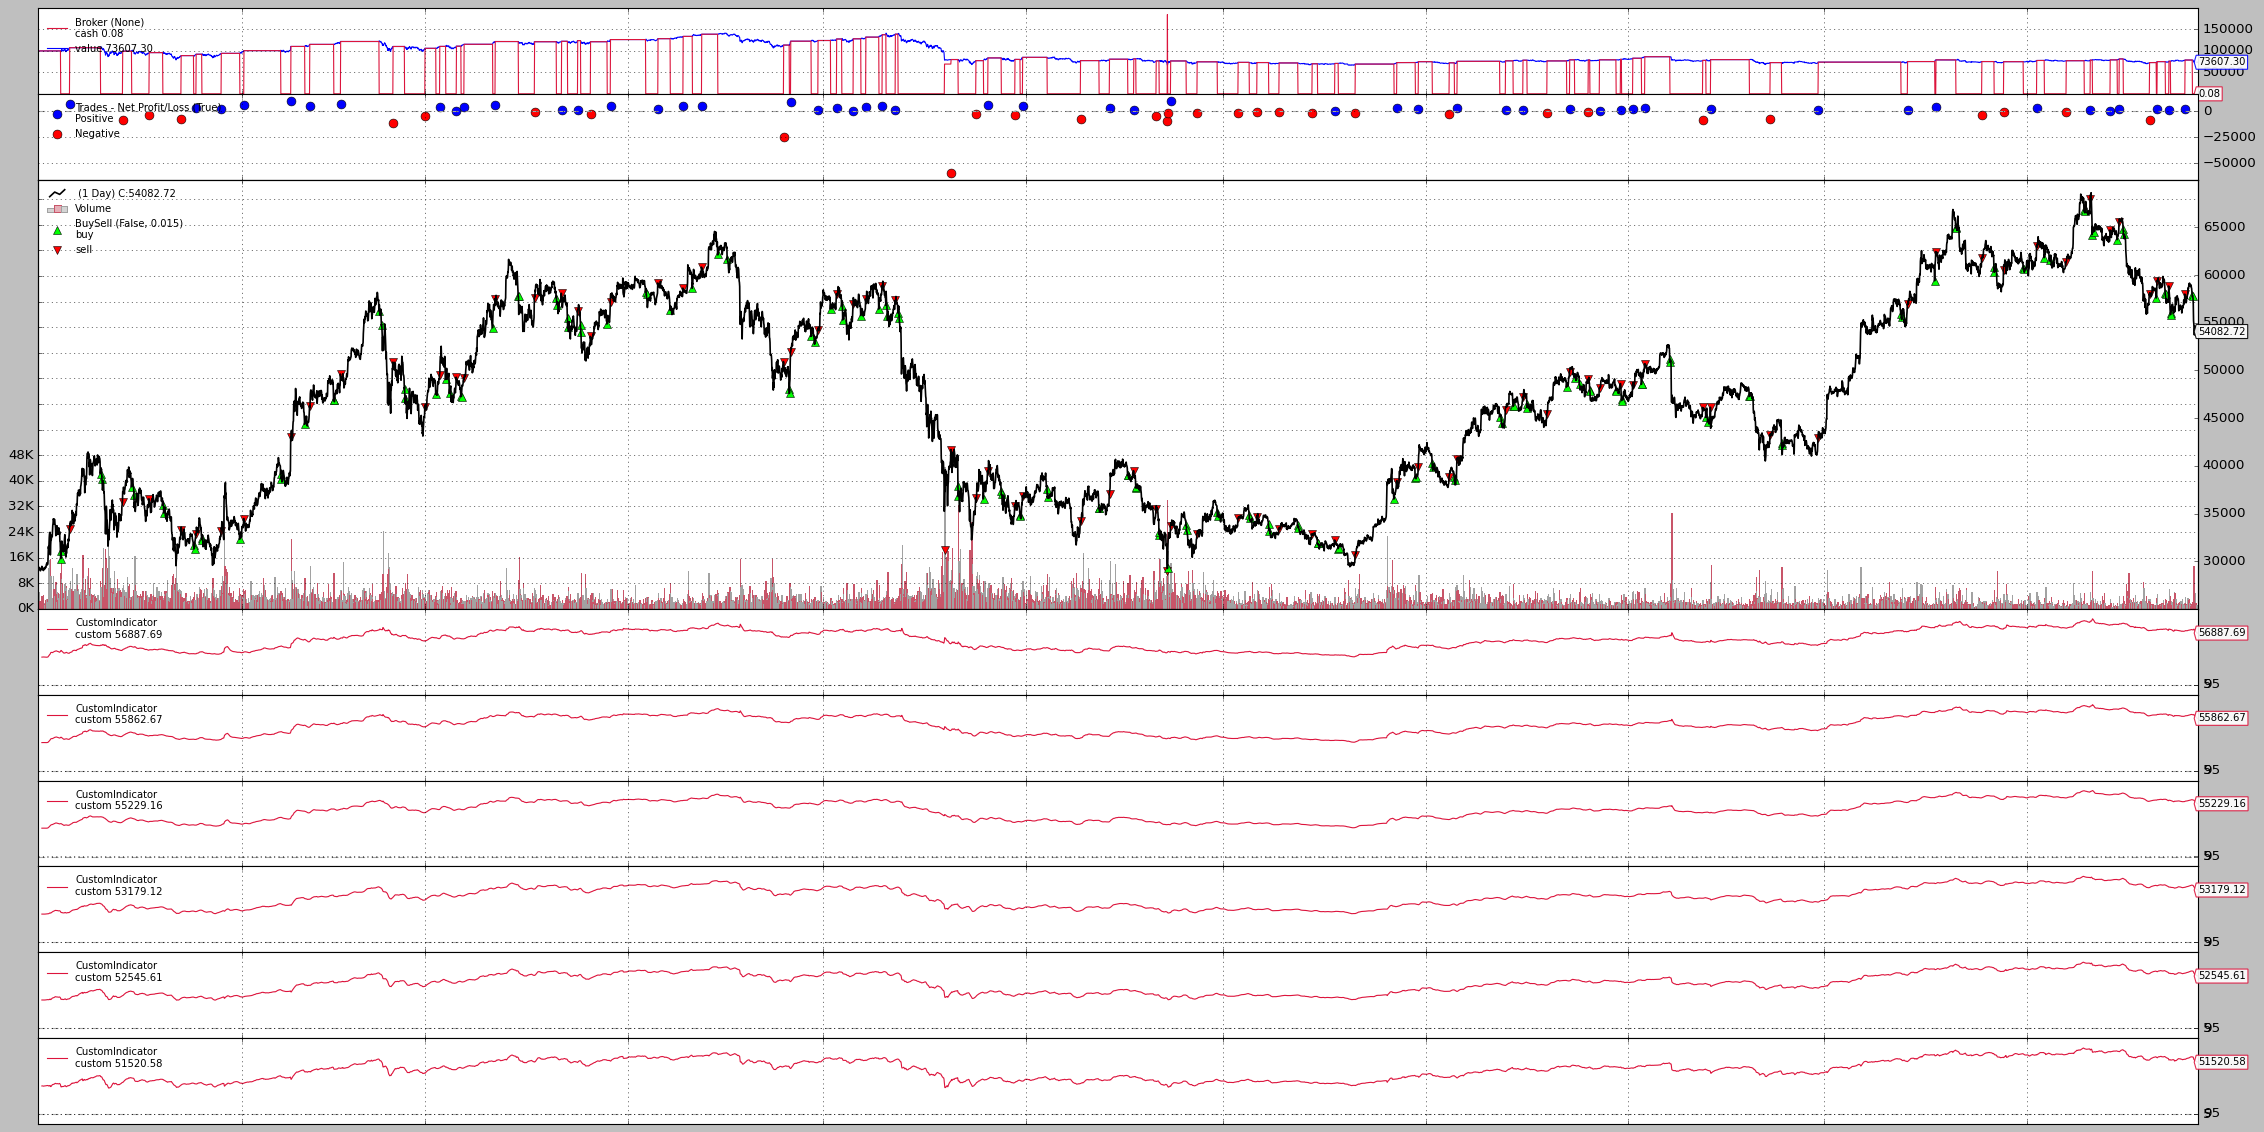

In [ ]:
result, history = backtest(MAMAStrategy,df, verbose=False, return_history=True, fractional=True)
# result

In [ ]:
result

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,U1,U2,U3,L1,L2,L3,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,True,0.001,None,0,0.5,0,0,close,,,False,1.5,0,M,True,U1,U2,U3,L1,L2,L3,-0.306426,-0.000926,-0.208077,-20.807695,5392,47.936617,67772.874494,"{'len': 5392, 'drawdown': 52.9661229560291, 'm...",52.679188,225,None,-26392.7,73607.302582,82,0.621951,51,30,3345.779271,3.345779,-6394.364965,-6.394365,10028.607831,10.028608,-59134.415843,-59.134416


In [ ]:
history['orders']

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,,2021-01-04 10:00:00,buy,31038.63,3.218573,99900.099900,0.0,0.000000
1,0,,2021-01-04 11:00:00,buy,30270.76,0.003297,99.800300,0.0,0.000000
2,0,,2021-01-05 19:00:00,sell,33372.84,-3.221870,99999.900200,0.0,7523.052852
3,0,,2021-01-10 12:00:00,buy,39181.76,2.741470,107415.637215,0.0,0.000000
4,0,,2021-01-10 18:00:00,buy,38571.86,0.002782,107.308329,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
223,0,,2021-11-22 20:00:00,buy,55993.03,1.357137,75990.199851,0.0,0.000000
224,0,,2021-11-22 21:00:00,buy,55850.59,0.001359,75.914286,0.0,0.000000
225,0,,2021-11-25 01:00:00,sell,58008.06,-1.358496,76066.114137,0.0,2737.603822
226,0,,2021-11-26 04:00:00,buy,57900.91,1.359652,78725.068804,0.0,0.000000
